In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

In [2]:
path = "/mnt/c/Users/olivi/OneDrive - Amherst College/6 Summer 2025/surface-detection"

##### 128x2 Variable Threshold Sequence Dataset

In [ ]:
thresholds = [
    [25, 26, 27, 28, 28],
    [21, 17, 21, 20, 21],
    [19, 14, 22, 25, 25],
    [25, 22, 27, 24, 27],
    [24, 22, 24, 26, 25]
]

s1_counts = [
    [156, 145, 154, 160, 142], # User 1
    [149, 130, 156, 136, 120], # User 2
    [142, 103, 142, 152, 137], # User 3
    [145, 144, 159, 149, 142], # User 4
    [137, 138, 136, 124, 134]  # User 5
]

locations = ["A", "B", "C", "D", "E"]
labels = ["User 1", "User 2", "User 3", "User 4", "User 5"]

In [ ]:
s2_counts = [
    [156, 147, 154, 160, 143], # User 1
    [158, 125, 155, 137, 122],
    [147, 100, 145, 153, 140],
    [150, 153, 161, 150, 148],
    [149, 143, 147, 157, 140]
]
s5_counts = [
    [161, 167, 154, 166, 154],
    [151, 148, 156, 142, 130],
    [146, 116, 142, 159, 148],
    [145, 161, 159, 152, 167],
    [144, 155, 136, 128, 148]
]
s6_counts = [
    [142, 145, 144, 151, 138],
    [135, 130, 135, 122, 118],
    [131, 103, 131, 140, 134],
    [129, 144, 131, 141, 139],
    [123, 138, 119, 106, 131]
]

In [ ]:
def dataset_barplot(split, title=""):
    colors = plt.get_cmap('Set2').colors

    split = np.array(split)
    x = np.arange(5)

    fig, ax = plt.subplots()
    bottom = np.zeros(5)
    for i, row in enumerate(split):
        ax.bar(x, row, bottom=bottom, label=labels[i], color = colors[i])
        bottom += row 

    ax.set_xticks(x)
    ax.set_xticklabels(locations)
    ax.set_xlabel("Location")
    ax.set_ylabel("Number of Sequences")

    # ax.legend(loc="upper center", bbox_to_anchor=(0.5, 1.12), ncol=5)
    pos = ax.get_position()
    ax.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
    ax.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))
    
    plt.title(title)
    plt.show()

In [ ]:
# counts: stacked barplot
dataset_barplot(s6_counts)

# thresholds: line plot
colors = plt.get_cmap('Set3').colors
for i in range(5):
    plt.plot(locations, thresholds[i], label=labels[i], color = colors[i])
plt.legend()
plt.xlabel("Location")
plt.ylabel("Peak Acceleration Threshold")
plt.show()

##### Single sequence (normalized)

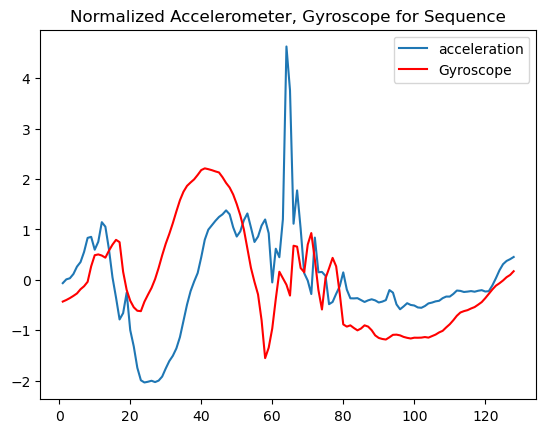

In [6]:
def sequence_norm(user=2, location="A", instance=1):
    A1 = pd.read_csv(f"{path}/sequences/set1/User{user}_Location{location}_Normal_{instance}.dat", header=None)
    plt.plot(list(range(1, 129)), (A1[0] - A1[0].mean()) / (A1[0].std()), label='acceleration')
    plt.plot(list(range(1, 129)), (A1[1] - A1[1].mean()) / A1[1].std(), color='red', label="Gyroscope")
    plt.title("Normalized Accelerometer, Gyroscope for Sequence")
    plt.legend()
    plt.show()

sequence_norm()

##### Dataset split visualization

In [ ]:
# load dataset partitions, filenames
lines = []
with open(f"{path}/sequences/set2_filenames.txt", 'r') as filenames:
    lines = filenames.readlines()

In [ ]:
def split_barplot(filepath, title):
    indices = []
    with open(filepath) as f:
        indices = f.readlines()
    counts = [[0 for i in range(0, 5)] for j in range(0, 5)] # initialize to zeros
    for i in indices:
        user = 0
        match lines[int(i.strip())-1].split('_')[0]:
            case "User1" : user = 0
            case "User2" : user = 1
            case "User3" : user = 2
            case "User4" : user = 3
            case "User5" : user = 4
        match lines[int(i.strip())-1].split('_')[1]:
            case "LocationA" : counts[user][0] += 1
            case "LocationB" : counts[user][1] += 1
            case "LocationC" : counts[user][2] += 1
            case "LocationD" : counts[user][3] += 1
            case "LocationE" : counts[user][4] += 1
    dataset_barplot(counts, title)

In [ ]:
split_barplot(f"{path}/logs/dataset-info/set2_train.txt", "Training Set")
# split_barplot(f"{path}/logs/dataset-info/u5out_val.txt", "Validation Set")
split_barplot(f"{path}/logs/dataset-info/set2_test.txt", "Test Set")

##### Violin plot

In [ ]:
sets = ["set1", "set2", "set3", "set4", "set5", "set6"]
datasets = ["train", "test"]

In [ ]:
def violin1(set):
    arr = np.zeros((10,2))
    for i in range(len(datasets)):
        for j in range(10):
            preds = pd.read_csv(f"{path}/logs/set-results/{set}_{datasets[i]}_{j+1}.txt")
            confusion = sklearn.metrics.confusion_matrix(preds["True"], preds["Predicted"])
            arr[j,i] = np.trace(confusion) / np.sum(confusion)
    plt.violinplot(arr, showmedians=True)
    plt.title(f"Accuracy over 10 Trials ({set.capitalize()})")
    plt.ylabel("Accuracy")
    plt.xlabel("Dataset (Train, Test = 1, 2)")
    plt.savefig(f"{path}/figures/set-results/{set}_violin.png")
    plt.show()

In [ ]:
def violin2():
    arr1 = np.zeros((10, len(sets)))
    arr2 = np.zeros((10,len(sets)))
    for i in range(len(sets)):
        for j in range(10):
            # training set
            preds1 = pd.read_csv(f"{path}/logs/set-results/{sets[i]}_train_{j+1}.txt")
            confusion1 = sklearn.metrics.confusion_matrix(preds1["True"], preds1["Predicted"])
            arr1[j,i] = np.trace(confusion1) / np.sum(confusion1)

            # test set
            preds2 = pd.read_csv(f"{path}/logs/set-results/{sets[i]}_test_{j+1}.txt")
            confusion2 = sklearn.metrics.confusion_matrix(preds2["True"], preds2["Predicted"])
            arr2[j,i] = np.trace(confusion2) / np.sum(confusion2)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
    
    plots1 = ax1.violinplot(arr1, showmedians=True)
    # plots1['bodies'][-1].set_facecolor("purple")
    ax1.set_title("Training Set", fontsize=10)
    ax1.set_xlabel("Dataset Version")
    ax1.set_xlabel("Dataset Version")
    ax1.set_ylabel("Accuracy")

    plots2 = ax2.violinplot(arr2, showmedians=True)
    # plots2['bodies'][-1].set_facecolor("purple")
    ax2.set_title("Test Set", fontsize=10)
    ax2.set_xlabel("Dataset Version")

    plt.suptitle("2 Channels (1) vs. 6 Channels (2)")

    # plt.title(f"Accuracy over 10 Trials")
    # plt.savefig(f"{path}/figures/set-results/{set}_violin.png")
    plt.show()

In [ ]:
violin1("set9")

In [ ]:
# sets = ["set1", "set4", "set5", "set7"]
sets = ["set1", "set9"]
# sets = ["set1", "set7", "set9"]
violin2()